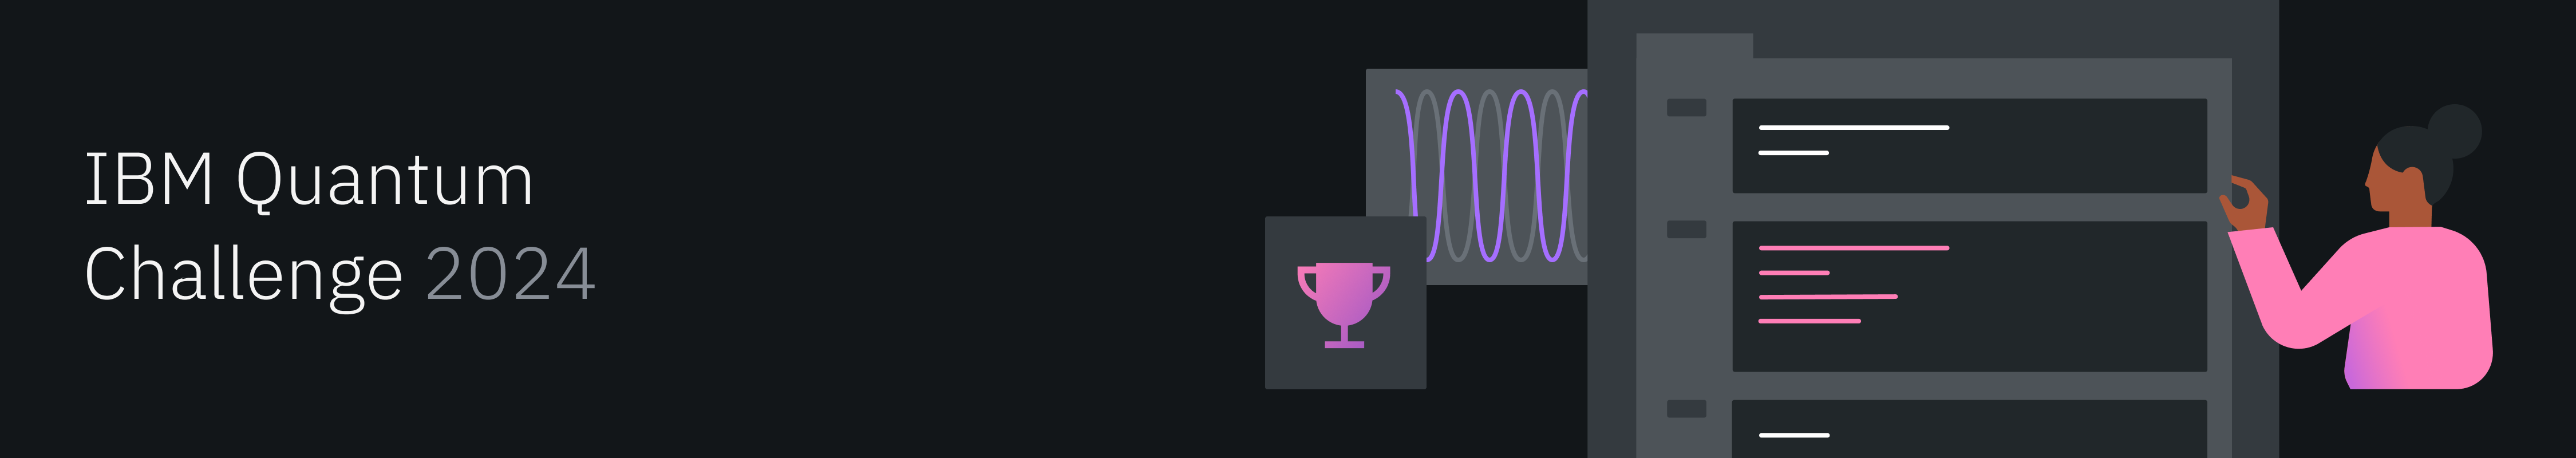

# AIを活用した Qiskit Transpiler Service を使ってみる(2024年 Lab3)

```{important}
このLabはIBM Quantum Premium Planユーザーのみ実行可能です。（Quantum Challenge中はイベント用に権限が付与されます）
```

## Setup

In [1]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are using python 3.10 or 3.11 for compatibility of the required packages
# %pip install qiskit[visualization]==1.0.2
# %pip install qiskit-ibm-runtime
# %pip install qiskit-aer
# %pip install graphviz
# %pip install qiskit-transpiler-service
# %pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

In [2]:
# Load your API token in .env

%load_ext dotenv
%dotenv

In [3]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

## はじめに

Lab 3 へようこそ！ 本日は、Qiskit スタック用に開発されているエキサイティングな新機能の一部を、特別にご紹介します。この教育的な Challenge は notebook が分かれていて、それぞれがユニークで画期的なイノベーションを紹介し、これらの新機能を探索しテストを促します。複雑な量子回路を簡素化する Circuit Knitting Toolboxのようなツールを探求し、Qiskit Serverless で量子コンピューティングと古典コンピューティングのシームレスな統合をセットアップするワークフローを体験し、AI-Powered Transpiler Passes と コード生成と回路最適化のための Qiskit Code Assistant のような AI 搭載ツールを活用するチャンスがあります。これらのイノベーションが量子開発にどのような革命をもたらすのか、ぜひご覧ください！

```{warning}
これらの機能は **ベータ版およびリリースプレビュー版** であるため、バグに遭遇する可能性が高いことにご注意ください。量子開発の限界に挑戦してください！
```

## Qiskit Transpiler service を使った AI 搭載 transpiler passes の紹介


このLabでは、Qiskit の AI 搭載 transpiler passes の最先端機能を探求します。最新の Qiskit Transpiler Serviceのベータ版リリースにより、 AI と IBM Cloud&reg; リソースを活用して量子回路をより効率的に最適化できるようになりました。

特定の量子デバイスの制約や特性に合わせて抽象化された量子回路をトランスパイルすることは、量子コンピューティングのワークフローにおいて非常に重要なステップです。Lab 2 で学んだように、このプロセスは従来、ヒューリスティックなアルゴリズムに依存していましたが、新しいAIを搭載したtranspiler passes は、実用的なアプリケーション向けに十分な速度でありながら、より効率的で高品質なトランスパイルの可能性を提供します。

今回のチャレンジでは、Qiskit Transpiler Service のベータ版へのアクセス権を提供し、実験していただきます。

**このツールの詳細については、 [ブログ](https://www.ibm.com/quantum/blog/ai-transpiler-passes) と [arxiv論文](https://arxiv.org/abs/2405.13196) をご覧ください。** ツールのドキュメントは [IBM Quantum Platform docs](https://docs.quantum.ibm.com/transpile/qiskit-transpiler-service) にあります。

この Exercise では、このベータ・リリース・プレビューで、 AI 搭載 transpiler passes を実験し、従来の手法と比較し、量子コンピューティング・ワークフローをどのように強化できるかを理解します。さあ、量子回路最適化の未来に飛び込んでみましょう！

### Step 1: 回路の作成

Qiskit の circuit library を使って量子回路を作成します。このステップでは、量子回路の構造とゲートを定義します。これは、その後のトランスパイルと最適化のタスクの基礎となります。ここでは、元の [論文](https://arxiv.org/abs/2405.13196) で示された回路と非常によく似た回路を使用します。

In [4]:
NUM_QUBITS = 61

Original circuit -> Depth: 63, CNOTs: 61


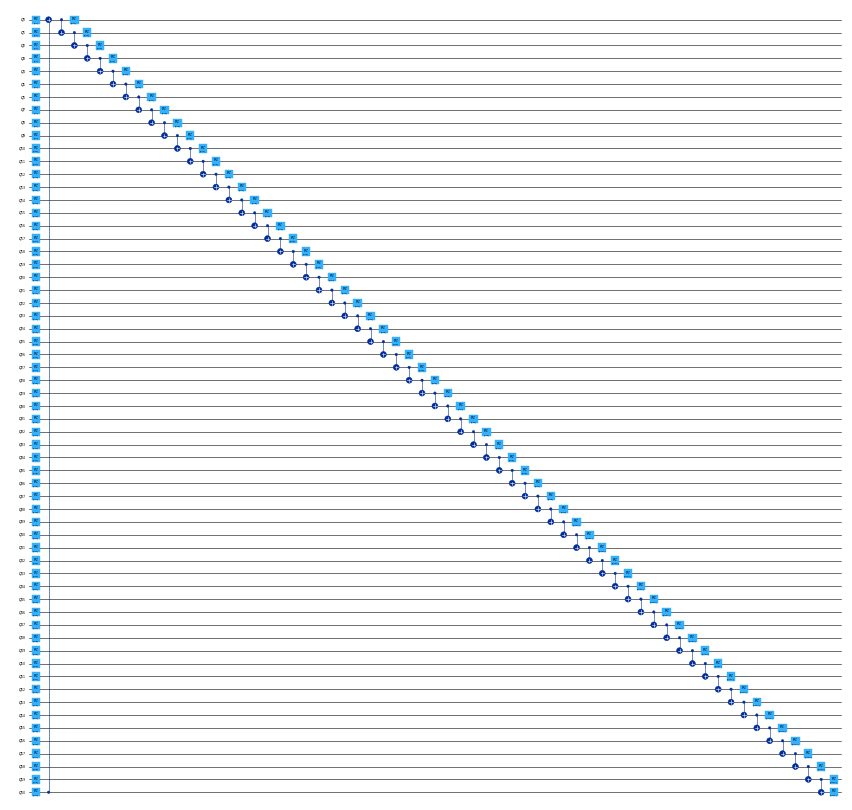

In [5]:
circuit = EfficientSU2(NUM_QUBITS, su2_gates="rz", entanglement="circular", reps=1).decompose()

print(f"Original circuit -> Depth: {circuit.depth()}, CNOTs: {circuit.num_nonlocal_gates()}")
circuit.draw(fold=-1, output="mpl", style="iqp", scale=0.2)

### Step 2: 回路のトランスパイルと最適化

このステップでは、Qiskit Transpiler Service を使って回路をトランスパイルし、最適化します。このプロセスを2回実行します。最初はAIなしで、次にAIを使用した transpiler passes を使用します。

Qiskit Transpiler Service は、クラウド上でヒューリスティックなトランスパイラー機能とAIによるトランスパイラー機能の両方を提供します。IBM Quantum™ のクラウドリソースと高度な AI 搭載 transpiler passes の恩恵を受けるために、実行中のトランスパイル・タスクを活用することができます。 

**詳細については、 [こちら](https://docs.quantum.ibm.com/transpile/qiskit-transpiler-service) の Qiskit Transpiler Serviceのドキュメントを参照してください。** 


#### Exercise 1: Qiskit Transpiler Service - AI なし

AIなし：Qiskit Transpiler Service で利用可能な従来のヒューリスティック手法を使って回路をトランスパイルします。

```{admonition}Exercise
Qiskit Transpiler Service をセットアップして、クラウド上に回路をトランスパイルしましょう。Qiskit Transpiler Service の最新版がインストールされ、設定されていることを確認してください。この演習では `ibm_brisbane` バックエンドを使用します。バックエンドを設定し、 **AI フラグをオンにせず、** optimization level  `3` で transpiler を構成します。
```

In [6]:
backend_name = 'ibm_brisbane'
optimization_level = 3

In [7]:
transpiler_ai_false = TranspilerService( # Add your code here
    backend_name=backend_name,
    ai=False,
    optimization_level=optimization_level
)

In [8]:
circuit_ai_false = transpiler_ai_false.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled without AI -> Depth: 1339, CNOTs: 343


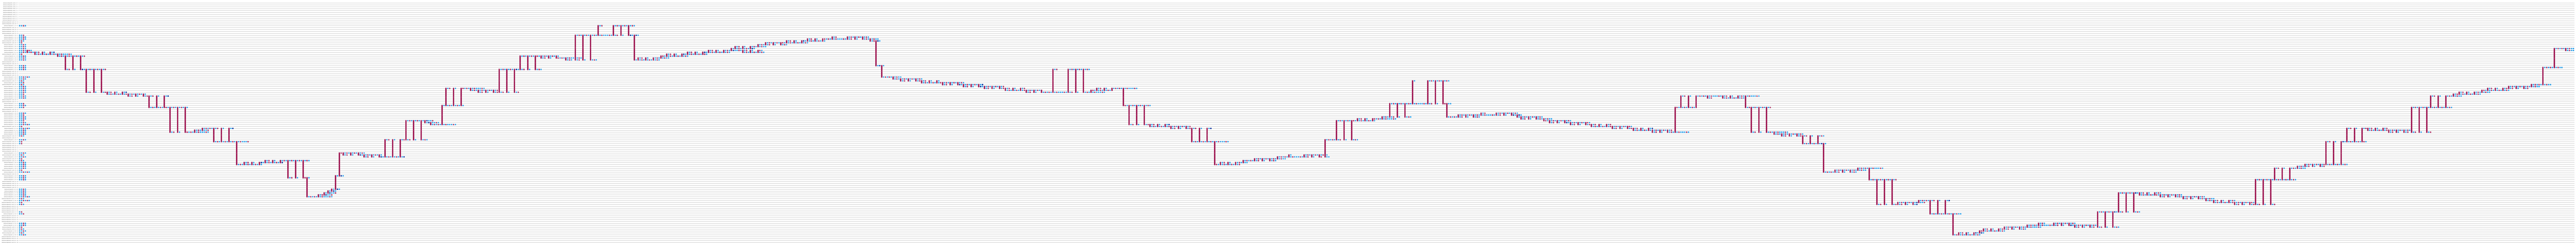

In [9]:
print(f"Transpiled without AI -> Depth: {circuit_ai_false.depth()}, CNOTs: {circuit_ai_false.num_nonlocal_gates()}")
circuit_ai_false.draw(fold=-1, output="mpl", scale=0.2)

#### Exercise 2: Qiskit Transpiler Service - AI搭載
AIを搭載した transpiler passes を有効にして、回路の最適化をどのように改善できる可能性があるかを確認します。

```{admonition}Exercise
それでは AI フラグを `on` にして Qiskit Transpiler サービスを使用してみましょう。環境が Qiskit Transpiler Service の最新バージョンでセットアップされていることを確認してください。引き続き `ibm_brisbane` バックエンドを使用します。トランスパイラーを optimization level `3` で設定し、AI フラグを有効にして. AI による高度な最適化を活用します。このセットアップでは、AI を活用してゲート数と回路深度を最適化することで、量子回路のトランスパイルを試みます。
```

In [10]:
transpiler_ai_true = TranspilerService( # Add your code here
    backend_name=backend_name,
    ai=True,
    optimization_level=optimization_level
)

In [11]:
circuit_ai_true = transpiler_ai_true.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled with AI -> Depth: 277, CNOTs: 64


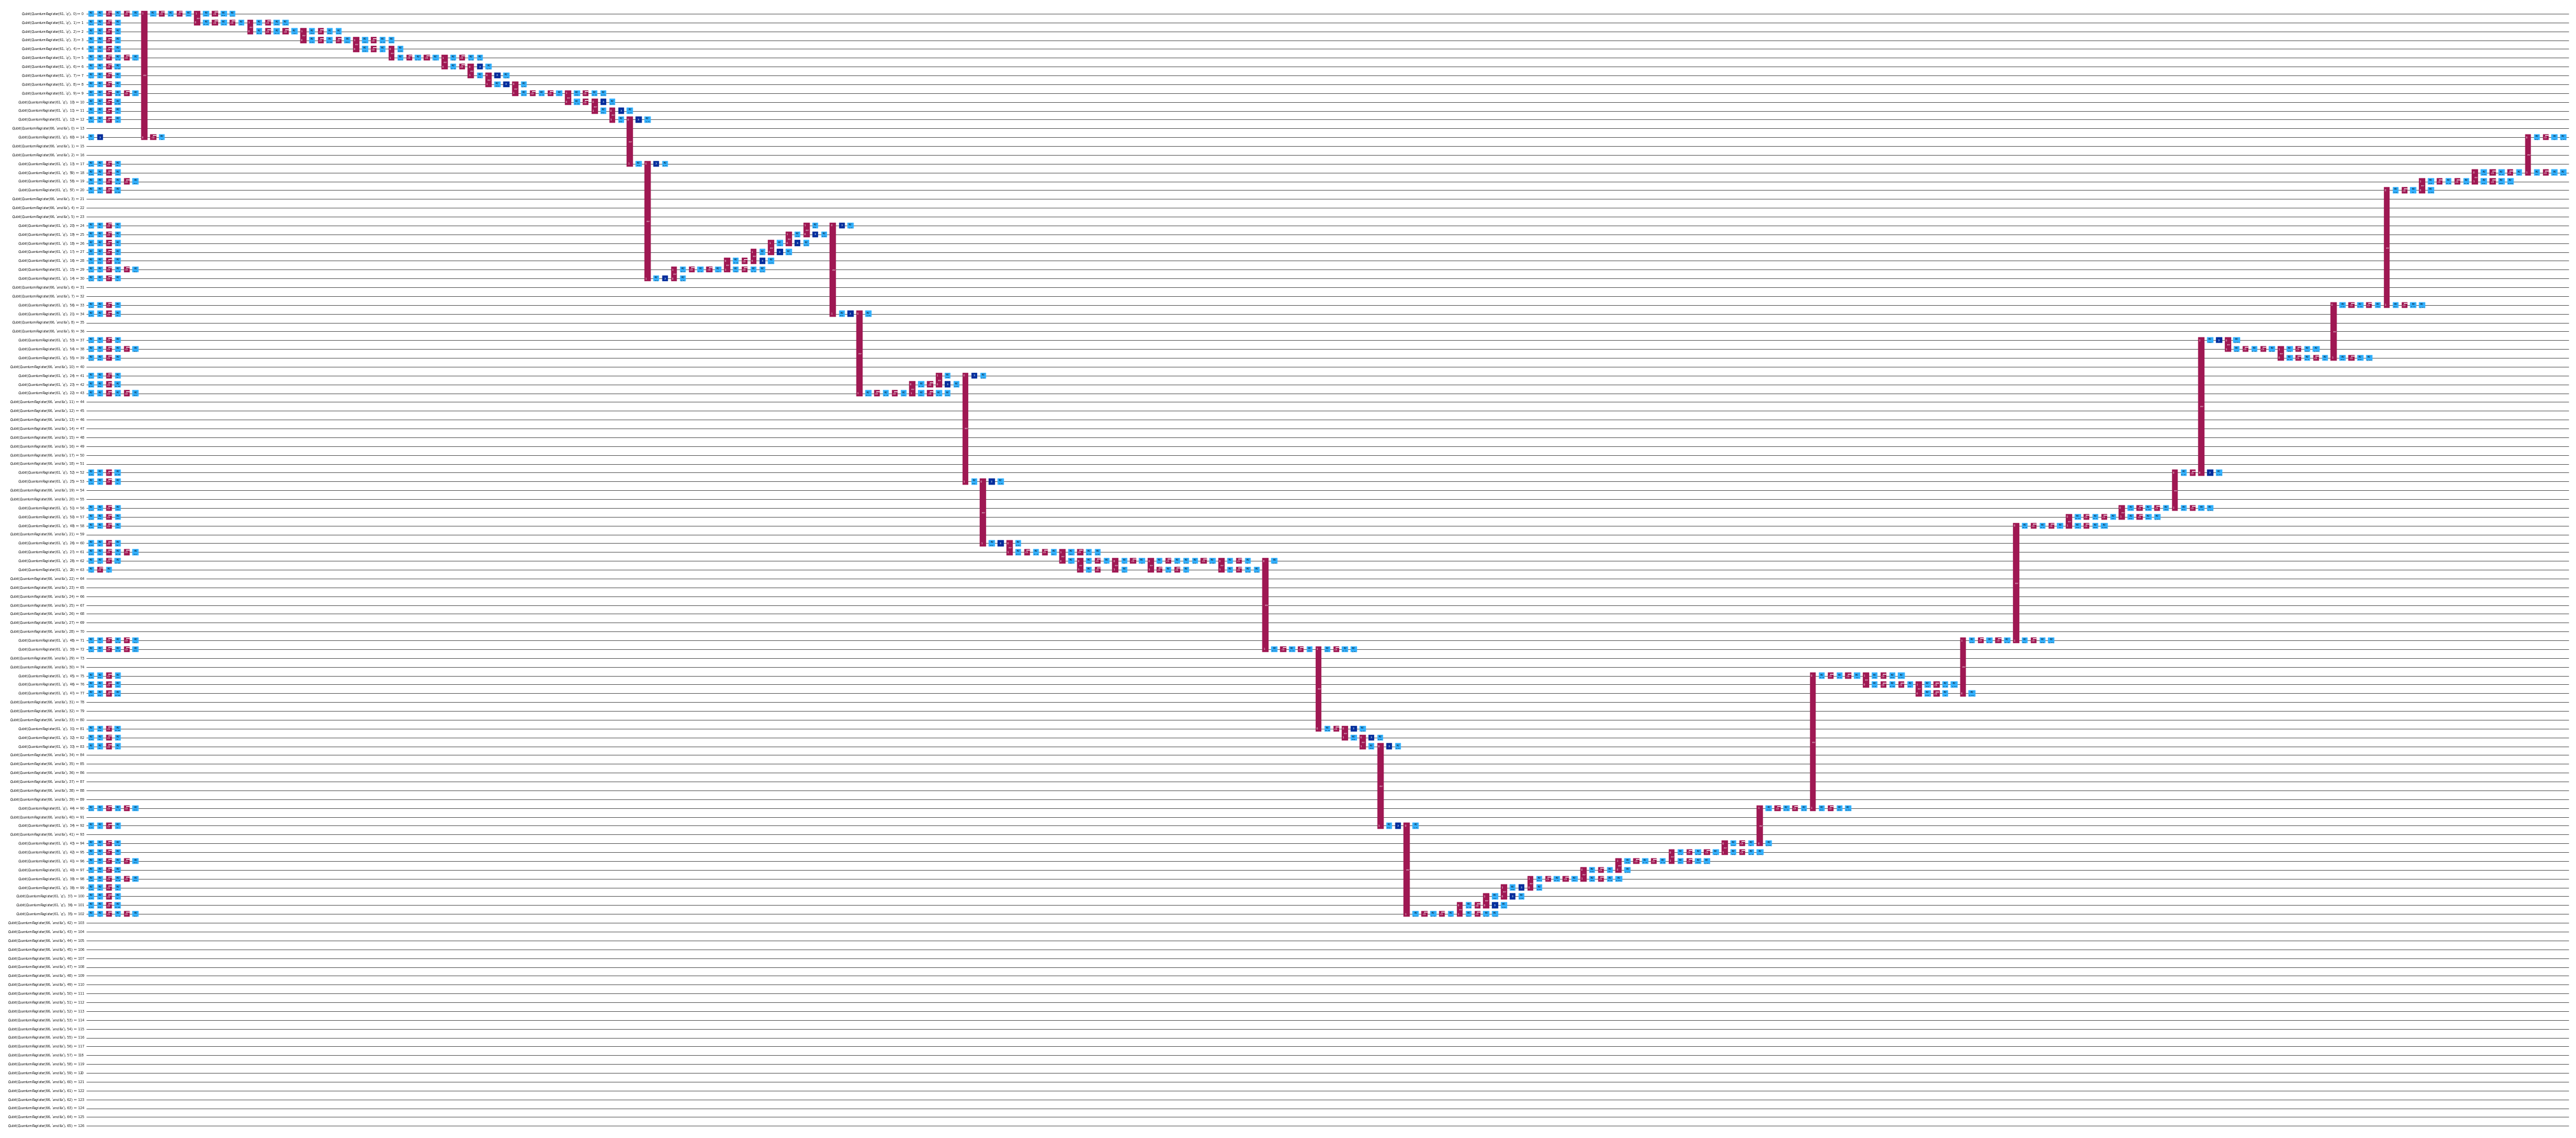

In [12]:
print(f"Transpiled with AI -> Depth: {circuit_ai_true.depth()}, CNOTs: {circuit_ai_true.num_nonlocal_gates()}")
circuit_ai_true.draw(fold=-1, output="mpl", scale=0.2)

```{note}
ヒューリスティックにトランスパイルをした場合の量子回路の深さは1300程度であるのに対して、AIトランスパイルの場合は270程度に抑えられていて、効果的にトランスパイル出来ていることが確認できます。
```

### Step 3: 結果の可視化
トランスパイルと最適化の結果を可視化します。グラフをプロットして、 AI を使用してトランスパイルした回路と AI を使用しない回路の性能指標（深さ、ゲート数など）を比較します。これにより、 AI 搭載 transpiler passes が量子回路に与える影響を理解することができます。

In [13]:
# Transpiling locally using Qiskit SDK
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

In [14]:
# Run and compile results
num_qubits = [11, 21, 41, 61, 81]
num_cnots_local = []
num_cnots_with_ai = []
num_cnots_without_ai = []

for nq in num_qubits:
    circuit = EfficientSU2(nq, su2_gates="rz", entanglement="circular", reps=1).decompose()

    # Using the Transpiler locally on Qiskit 
    circuit_local = pm.run(circuit)
    # Using the transpiler service without AI
    circuit_without_ai = transpiler_ai_false.run(circuit)
    # Using the transpiler service with AI
    circuit_with_ai = transpiler_ai_true.run(circuit)

    num_cnots_local.append(circuit_local.num_nonlocal_gates())
    num_cnots_without_ai.append(circuit_without_ai.num_nonlocal_gates())
    num_cnots_with_ai.append(circuit_with_ai.num_nonlocal_gates())

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_tr

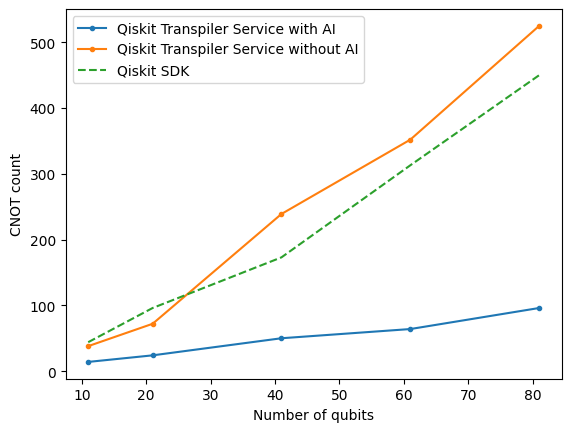

In [15]:
plt.plot(num_qubits, num_cnots_with_ai, '.-')
plt.plot(num_qubits, num_cnots_without_ai, '.-')
plt.plot(num_qubits, num_cnots_local, '--')
plt.xlabel("Number of qubits")
plt.ylabel("CNOT count")
plt.legend(["Qiskit Transpiler Service with AI", "Qiskit Transpiler Service without AI", "Qiskit SDK"])

AI Transpiler セクションの完了おめでとうございます！Qiskitの AI 搭載 transpiler passes の最先端機能を探求する機会を得ました。この革新的な機能は、 AI を活用して量子回路を最適化し、より効率的で効果的な実行を提供します。 AI を活用した最適化の実験を続けることで、量子コンピューティングの限界をさらに押し広げることができます。スキルを磨き、量子開発における AI の可能性を探求し続けてください。これからも素晴らしい仕事を続けてください！

## 追加情報

**Created by:** Vishal Sharathchandra Bajpe, David Kremer

**Advised by:** Junye Huang, Juan Cruz Benito

**Version:** 1.0.0